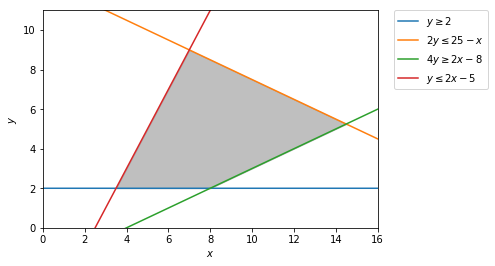

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines
# x>0
x = np.linspace(0,20,2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25-x
y2 = (25-x)/2.0
# 4y >= 2x-8
y3 = (2*x-8)/4.0
#y<= 2x-5
y4= (2*x-5)

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq2x-8$')
plt.plot(x, y4, label=r'$y\leq2x-5$')
plt.xlim((0,16))
plt.ylim((0,11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

#fill feasible region
y5 = np.minimum(y2,y4)
y6 = np.maximum(y1,y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [2]:
import pulp

In [8]:
my_lp_problem = pulp.LpProblem("My LP Problem", pulp.LpMaximize)

In [9]:
x = pulp.LpVariable('x', lowBound =0 , cat='Continuous')
y = pulp.LpVariable('y', lowBound =0 , cat='Continuous')

In [10]:
#Objective function
my_lp_problem += 4*x + 3*y, "Z"

#Constraints
my_lp_problem += y>= 2
my_lp_problem += 2*y <= 25-x
my_lp_problem += 4*y >= 2*x-8
my_lp_problem += y <= 2*x-5

In [11]:
my_lp_problem

My LP Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: y >= 2

_C2: x + 2 y <= 25

_C3: - 2 x + 4 y >= -8

_C4: - 2 x + y <= -5

VARIABLES
x Continuous
y Continuous

In [12]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

In [16]:
for variable in my_lp_problem.variables():
    print("{} = {}".format(variable.name, variable.varValue))
print(pulp.value(my_lp_problem.objective))

x = 14.5
y = 5.25
73.75


In [17]:
resource_problem = pulp.LpProblem("Resource Problem", pulp.LpMaximize)

a = pulp.LpVariable('a', lowBound = 0, cat='Integer')
b = pulp.LpVariable('b', lowBound = 0, cat='Integer')

#Objective Function
resource_problem += 30000*a + 45000*b, "Profit"

resource_problem += 3*a + 4*b <= 30
resource_problem += 5*a+ 6*b <= 60
resource_problem += 1.5*a + 3*b <= 21

resource_problem

Resource Problem:
MAXIMIZE
30000*a + 45000*b + 0
SUBJECT TO
_C1: 3 a + 4 b <= 30

_C2: 5 a + 6 b <= 60

_C3: 1.5 a + 3 b <= 21

VARIABLES
0 <= a Integer
0 <= b Integer

In [18]:
resource_problem.solve()
pulp.LpStatus[resource_problem.status]

'Optimal'

In [22]:
for variable in resource_problem.variables():
    print("{} = {}".format(variable.name, variable.varValue))
    
print("Total Profit " + str(pulp.value(resource_problem.objective)))

a = 2.0
b = 6.0
Total Profit 330000.0


In [38]:
blending_problem = pulp.LpProblem("Blending Problem", pulp.LpMinimize)

#variables
#here, we will define as dict
sausage_types = ['economy', 'premium']
ingredients = ['pork', 'wheat', 'starch']

ing_weight = pulp.LpVariable.dicts("weight_kg", ((i,j) for i in sausage_types for j in ingredients),
                                  lowBound = 0, cat='Continuous')

#objective function
blending_problem += (pulp.lpSum([4.32* ing_weight[(i,'pork')]
                                + 2.46* ing_weight[(i,'wheat')]
                                + 1.86* ing_weight[(i,'starch')]
                                for i in sausage_types]))

#constraints
#350 for economy sausages and 500 for premium sausages
blending_problem += pulp.lpSum([ ing_weight[('economy', j)] for j in ingredients]) == 350 * 0.05
blending_problem += pulp.lpSum([ ing_weight[('premium', j)] for j in ingredients]) == 500 * 0.05

#economy has >= 40% pork and premium has >=60%
blending_problem += ing_weight[('economy','pork')] >= 0.4* pulp.lpSum([ing_weight[('economy',j)] for j in ingredients])
blending_problem += ing_weight[('premium','pork')] >= 0.6* pulp.lpSum([ing_weight[('premium',j)] for j in ingredients])

#sausages must be <=25% starch
blending_problem += ing_weight[('economy','starch')] <= 0.25* pulp.lpSum([ing_weight[('economy',j)] for j in ingredients])
blending_problem += ing_weight[('premium','starch')] <= 0.25* pulp.lpSum([ing_weight[('premium',j)] for j in ingredients])

#have 30kg of pork, 20kg of wheat and 17kg of starch available
#but need to use at least 23kg
blending_problem += pulp.lpSum([ ing_weight[(i, 'pork')] for i in sausage_types]) <= 30
blending_problem += pulp.lpSum([ ing_weight[(i, 'wheat')] for i in sausage_types]) <= 20
blending_problem += pulp.lpSum([ ing_weight[(i, 'starch')] for i in sausage_types]) <= 17
blending_problem += pulp.lpSum([ ing_weight[(i, 'pork')] for i in sausage_types]) >= 23

blending_problem.solve()
pulp.LpStatus[blending_problem.status]





'Optimal'

In [39]:
for var in ing_weight:
    var_value = ing_weight[var].varValue
    print("The weight of {0} in {1} sausages is {2}kg".format(var[1], var[0], var_value))

The weight of pork in economy sausages is 7.0kg
The weight of wheat in economy sausages is 6.125kg
The weight of starch in economy sausages is 4.375kg
The weight of pork in premium sausages is 16.0kg
The weight of wheat in premium sausages is 2.75kg
The weight of starch in premium sausages is 6.25kg


In [40]:
total_cost= pulp.value(blending_problem.objective)
print("Total minimum cost "+ str(round(total_cost,2)))

Total minimum cost 140.96


In [41]:
blending_problem

Blending Problem:
MINIMIZE
4.32*weight_kg_('economy',_'pork') + 1.86*weight_kg_('economy',_'starch') + 2.46*weight_kg_('economy',_'wheat') + 4.32*weight_kg_('premium',_'pork') + 1.86*weight_kg_('premium',_'starch') + 2.46*weight_kg_('premium',_'wheat') + 0.0
SUBJECT TO
_C1: weight_kg_('economy',_'pork') + weight_kg_('economy',_'starch')
 + weight_kg_('economy',_'wheat') = 17.5

_C2: weight_kg_('premium',_'pork') + weight_kg_('premium',_'starch')
 + weight_kg_('premium',_'wheat') = 25

_C3: 0.6 weight_kg_('economy',_'pork') - 0.4 weight_kg_('economy',_'starch')
 - 0.4 weight_kg_('economy',_'wheat') >= 0

_C4: 0.4 weight_kg_('premium',_'pork') - 0.6 weight_kg_('premium',_'starch')
 - 0.6 weight_kg_('premium',_'wheat') >= 0

_C5: - 0.25 weight_kg_('economy',_'pork')
 + 0.75 weight_kg_('economy',_'starch') - 0.25 weight_kg_('economy',_'wheat')
 <= 0

_C6: - 0.25 weight_kg_('premium',_'pork')
 + 0.75 weight_kg_('premium',_'starch') - 0.25 weight_kg_('premium',_'wheat')
 <= 0

_C7: weight_kg